### Matplotlib에서 폰트 설정

In [1]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

### [Step1] 데이터 로드

In [2]:
import pandas as pd

df = pd.read_csv('./datasets/육군신체측정정보.csv')
df = df[:50000]
df

/tmp/ipykernel_231/1378697897.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/육군신체측정정보.csv')


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
49995,49996,2013,95.9,89.9,180.5,88.1,83.3,59.0,27.9,83.3
49996,49997,2013,110.5,87.5,175.0,103.9,81.0,57.9,26.6,97.7
49997,49998,2013,122.7,85.5,171.0,119.2,78.5,59.0,23.9,111.0
49998,49999,2013,117.2,89.1,178.9,113.4,83.5,56.9,26.1,98.4


### [Step2] 데이터 파악하기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   순번          50000 non-null  int64  
 1   측정 일자       50000 non-null  int64  
 2   가슴 둘레 센티미터  50000 non-null  float64
 3   소매길이 센티미터   50000 non-null  float64
 4   신장 센티미터     50000 non-null  float64
 5   허리 둘레 센티미터  50000 non-null  object 
 6   샅높이 센티미터    50000 non-null  float64
 7   머리 둘레 센티미터  50000 non-null  float64
 8   발 길이 센티미터   50000 non-null  float64
 9   몸무게 킬로그램    50000 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 3.8+ MB


In [4]:
df.describe()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,8.787122e+06,95.938400,87.362204,174.796986,78.853582,57.853790,26.695046,71.692152
std,14433.901067,9.987019e+06,9.042152,2.737865,5.450788,3.595366,1.867921,1.274613,13.671257
min,1.000000,2.013000e+03,75.000000,78.500000,157.700000,69.300000,52.000000,20.600000,40.700000
25%,12500.750000,2.013000e+03,89.400000,85.500000,171.100000,76.300000,56.600000,25.800000,61.800000
50%,25000.500000,2.013000e+03,94.900000,87.300000,174.700000,78.500000,57.800000,26.600000,69.600000
75%,37500.250000,2.014022e+07,101.500000,89.200000,178.400000,81.000000,59.100000,27.500000,79.500000
max,50000.000000,2.014043e+07,133.400000,99.300000,198.200000,102.700000,63.900000,34.200000,134.600000


### [Step3] 데이터 정제하기

In [5]:
df['허리 둘레 센티미터'] = df['허리 둘레 센티미터'].apply(lambda x : float(str(x)[:3]))
df = df[df['몸무게 킬로그램'] > 20]
df = df[df['샅높이 센티미터'] > 20]
# df = df[df['허리 둘레 센티미터'] < 5]
df

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.0,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.0,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.0,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.0,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.0,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
49995,49996,2013,95.9,89.9,180.5,88.0,83.3,59.0,27.9,83.3
49996,49997,2013,110.5,87.5,175.0,103.0,81.0,57.9,26.6,97.7
49997,49998,2013,122.7,85.5,171.0,119.0,78.5,59.0,23.9,111.0
49998,49999,2013,117.2,89.1,178.9,113.0,83.5,56.9,26.1,98.4


### [Step4] 새로운 열 추가(BMI)

In [6]:
df['BMI'] = df['몸무게 킬로그램']/((df['신장 센티미터']/100)**2)
df

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,BMI
0,1,20140106,96.3,92.6,185.5,82.0,83.8,57.1,28.5,73.2,21.272731
1,2,2013,101.9,83.8,167.2,81.0,74.4,55.0,24.2,65.1,23.286726
2,3,20140106,99.5,89.6,179.9,99.0,84.2,56.3,28.1,93.2,28.797420
3,4,2013,98.6,85.5,171.4,85.0,76.4,54.5,27.4,71.6,24.372012
4,5,20140106,94.7,88.1,176.9,78.0,79.7,58.5,26.5,67.1,21.442077
...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2013,95.9,89.9,180.5,88.0,83.3,59.0,27.9,83.3,25.567637
49996,49997,2013,110.5,87.5,175.0,103.0,81.0,57.9,26.6,97.7,31.902041
49997,49998,2013,122.7,85.5,171.0,119.0,78.5,59.0,23.9,111.0,37.960398
49998,49999,2013,117.2,89.1,178.9,113.0,83.5,56.9,26.1,98.4,30.744994


### [Step5] 데이터 시각화하기

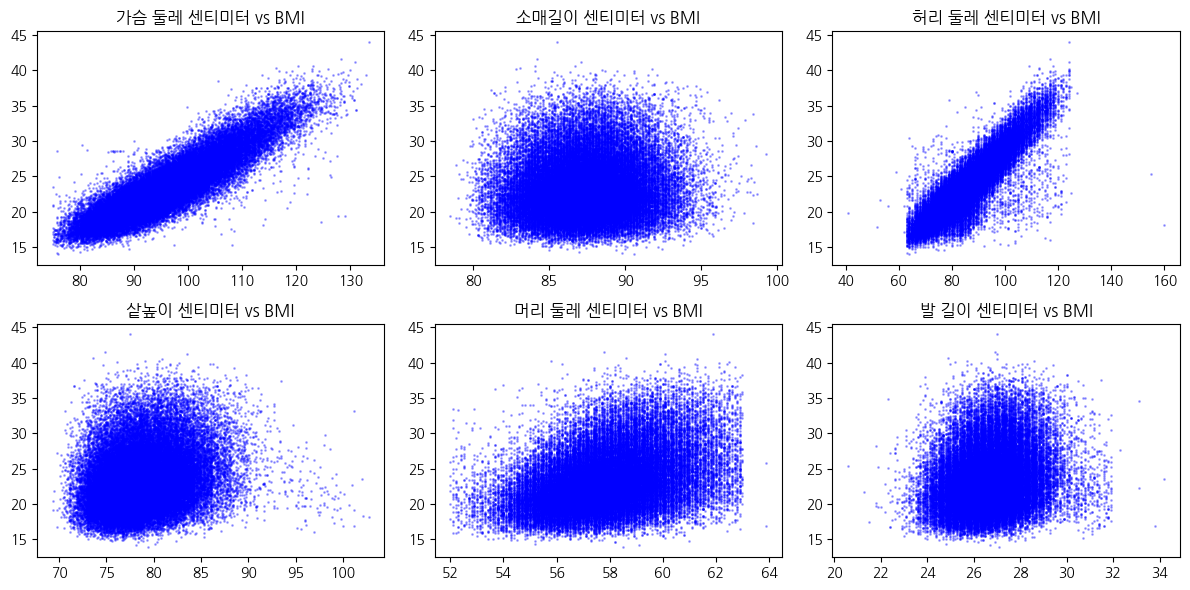

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,6))

features = ['가슴 둘레 센티미터', '소매길이 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터']
for i, f in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[f], df['BMI'], s = 1, alpha = 0.3, c = 'b')
    plt.title(f'{f} vs BMI')

plt.tight_layout( )
plt.show( )

### [Step6] 데이터를 학습데이터와 검증데이터로 분리하기

In [8]:
import numpy as np

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

x_train = np.array(train[['가슴 둘레 센티미터', '소매길이 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터']])
y_train = np.array(train['BMI'])

x_test = np.array(test[['가슴 둘레 센티미터', '소매길이 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터']])
y_test = np.array(test['BMI'])

print(len(x_train), len(y_train), len(x_test), len(y_test))

39935 39935 10065 10065


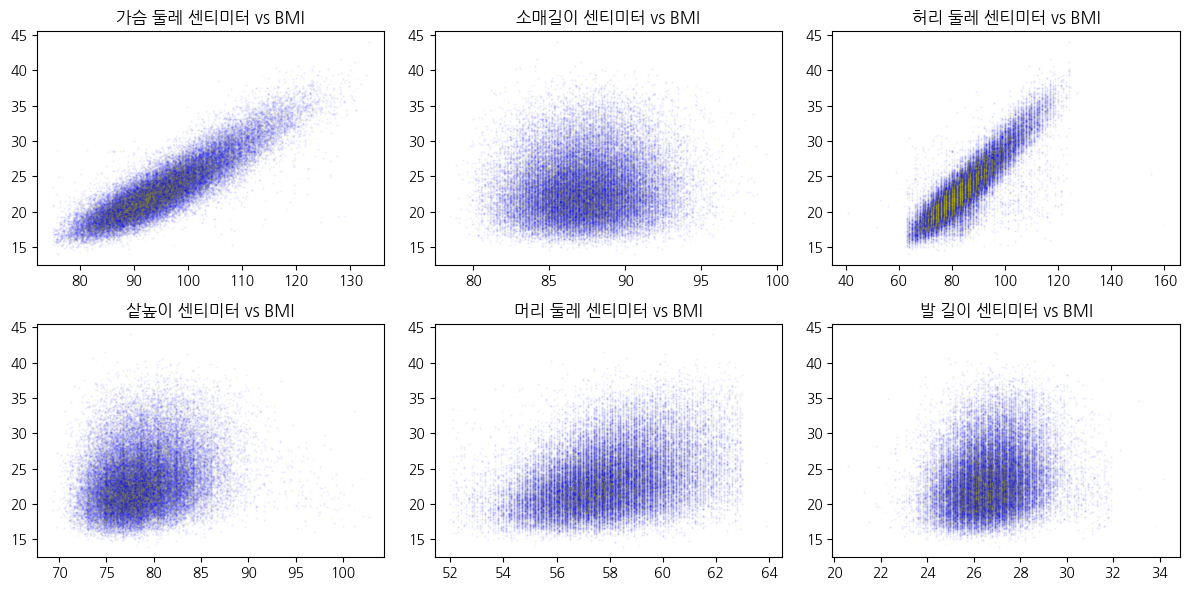

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,6))

features = ['가슴 둘레 센티미터', '소매길이 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터']
for i, f in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.scatter(train[f], train['BMI'], s = 0.5, alpha = 0.05, c = 'b')
    plt.scatter(test[f], test['BMI'], s = 0.5, alpha = 0.05, c = 'y')
    plt.title(f'{f} vs BMI')

plt.tight_layout( )
plt.show( )

### [Step7] 모델 구성하기

In [10]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(6),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

model.build(x_train.shape)

model.compile(optimizer="adam", loss='mse', metrics=['mae'])

model.summary()

2023-07-04 05:50:39.413993: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (39935, 6)                42        
                                                                 
 dense_1 (Dense)             (39935, 256)              1792      
                                                                 
 dense_2 (Dense)             (39935, 256)              65792     
                                                                 
 dense_3 (Dense)             (39935, 256)              65792     
                                                                 
 dense_4 (Dense)             (39935, 256)              65792     
                                                                 
 dense_5 (Dense)             (39935, 1)                257       
                                                                 
Total params: 199,467
Trainable params: 199,467
Non-trai

### [Step8] 모델 학습하기

In [11]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test), callbacks=[early_stop])

Epoch 1/10
1248/1248 [==============================] - 16s 12ms/step - loss: 3.5893 - mae: 1.3852 - val_loss: 2.4508 - val_mae: 1.1972
Epoch 2/10
1248/1248 [==============================] - 16s 13ms/step - loss: 2.7448 - mae: 1.2782 - val_loss: 2.5544 - val_mae: 1.2247
Epoch 3/10
1248/1248 [==============================] - 15s 12ms/step - loss: 2.6414 - mae: 1.2511 - val_loss: 2.4135 - val_mae: 1.1874
Epoch 4/10
1248/1248 [==============================] - 16s 13ms/step - loss: 2.5874 - mae: 1.2384 - val_loss: 2.3261 - val_mae: 1.1638
Epoch 5/10
1248/1248 [==============================] - 21s 17ms/step - loss: 2.5281 - mae: 1.2247 - val_loss: 2.2961 - val_mae: 1.1585
Epoch 6/10
 650/1248 [==============>...............] - ETA: 10s - loss: 2.4998 - mae: 1.2178

KeyboardInterrupt: 

### [Step9] 결과 시각화하기

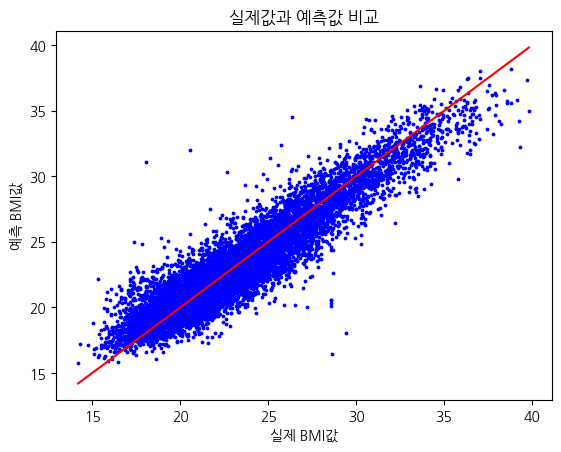

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model(x_test), s = 3, c = 'b')
plt.plot([y_test.min() + (y_test.max()-y_test.min())/10* i for i in range(11)],[y_test.min() + (y_test.max()-y_test.min())/10* i for i in range(11)], c = 'r')
plt.title("실제값과 예측값 비교")
plt.xlabel('실제 BMI값')
plt.ylabel('예측 BMI값')
plt.show()

### [Step10] BMI 예측 프로그램 만들기

In [13]:
info = []

info.append(int(input(f"당신의 신체정보를 입력하세요 : 가슴 둘레(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 소매길이(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 허리 둘레(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 샅높이(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 머리 둘레(cm)")))
info.append(int(input(f"당신의 신체정보를 입력하세요 : 발 길이(cm)")))

print(f'당신의 비만도(BMI)는 {model(np.array([info]))[0,0]:.2f} 입니다.')

당신의 신체정보를 입력하세요 : 가슴 둘레(cm) 80
당신의 신체정보를 입력하세요 : 소매길이(cm) 110
당신의 신체정보를 입력하세요 : 허리 둘레(cm) 40
당신의 신체정보를 입력하세요 : 샅높이(cm) 40
당신의 신체정보를 입력하세요 : 머리 둘레(cm) 50
당신의 신체정보를 입력하세요 : 발 길이(cm) 27


당신의 비만도(BMI)는 20.98 입니다.
